In [137]:
# Quick and easy overview testing a couple of ML supervised learning models
# as classifiers for the Mushroom dataset.

# The dataset itself consists of multiple categorical features so guess what,
# probably a tree will work wonders (don't need fancy deeplearning here)

# The dataset is explained here https://www.slideshare.net/rayborg/mushroom-tutorial

# loading some tools we will need
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# and load some models we will test
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Load dataset into Pandas

In [138]:
df = pd.read_csv('data/mushrooms.csv')

Do some exploratory data analysis EDA - dimension and type of data

In [139]:
df.shape

(8124, 23)

In [140]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The data contains letters (catagories) as data points for each feature so we must change these into numericals.

In [141]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Just checking how many edible and poisoneous mushrooms the data set offers.

In [142]:
df.groupby('class').size()

class
e    4208
p    3916
dtype: int64

Any nulls?

In [143]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [144]:
# encode the categories - don't use LabelEncoder as all features should be treated equal
# the below is a short cut and trick for OneHotEncoding using pandas dummies

for col in df.columns:
    df = pd.get_dummies(df,prefix=col, columns = [col], drop_first=True)   
 
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [146]:
X = df.iloc[:,1:96]  # all rows, not col0 but all the remainng cols which are features
y = df.iloc[:, 0]  # all rows, label col only

In [145]:
df.shape

(8124, 96)

96 features now - so it would be nice to reduce that... anyway - let's go ahead and use all of them.

In [147]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Let's see if there are highly correlated features to reduce dimensionality

In [148]:
# find correlations to target
corr_matrix = df.corr().abs()
print(corr_matrix['class_p'].sort_values(ascending=False).head(11))

class_p                       1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
bruises_t                     0.501530
stalk-surface-above-ring_s    0.491314
spore-print-color_h           0.490229
ring-type_l                   0.451619
Name: class_p, dtype: float64


The following 10 features explains a lot if the class is edible or not:

* odor_n                        0.785557
* odor_f                        0.623842
* stalk-surface-above-ring_k    0.587658
* stalk-surface-below-ring_k    0.573524
* ring-type_p                   0.540469
* gill-size_n                   0.540024
* bruises_t                     0.501530
* stalk-surface-above-ring_s    0.491314
* spore-print-color_h           0.490229
* ring-type_l                   0.451619

Particularly we see that if a mushroom has no smell or a foul smell, then it's likely to explain edible/poisenous.

With these 10 features we will test how good a model we can create.

Let's check the opposite - what features explains the least:

In [149]:
print(corr_matrix['class_p'].sort_values(ascending=True).head(10))

stalk-surface-above-ring_y    0.016198
stalk-root_b                  0.017712
cap-shape_f                   0.018526
cap-surface_g                 0.023007
cap-shape_c                   0.023007
cap-shape_x                   0.026886
cap-color_c                   0.030910
veil-color_y                  0.032545
stalk-color-above-ring_y      0.032545
cap-color_p                   0.034702
Name: class_p, dtype: float64


Interesting - if a mushroom has a green or pink cap color it says very little about edibility.

In [150]:
# first let's run all the data and setup models
# to find a model that works the best
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
resultsmean = []
resultsstddev = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    resultsmean.append(cv_results.mean())
    resultsstddev.append(cv_results.std())


LR: 0.999538 (0.000705)
LDA: 0.999538 (0.000705)
KNN: 0.999538 (0.000705)
CART: 0.999846 (0.000462)
NB: 0.944762 (0.014616)
SVM: 0.996922 (0.002177)


In [151]:
# sort it a little nicer

resultsDf = pd.DataFrame(
    {'name': names,
     'mean': resultsmean,
     'std dev': resultsstddev
    }
)
resultsDf = resultsDf.sort_values(by=['mean'], ascending=False)
print(resultsDf)

name      mean   std dev
3  CART  0.999846  0.000462
0    LR  0.999538  0.000705
1   LDA  0.999538  0.000705
2   KNN  0.999538  0.000705
5   SVM  0.996922  0.002177
4    NB  0.944762  0.014616


In [152]:
# Make predictions using validation dataset using CART model
model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)
predictions = model1.predict(X_validation)

In [153]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



odor_n                        0.623007
stalk-root_c                  0.172322
stalk-root_r                  0.082753
spore-print-color_r           0.032472
gill-spacing_w                0.028023
stalk-shape_t                 0.024106
stalk-color-below-ring_w      0.017210
stalk-surface-below-ring_y    0.012373
stalk-root_b                  0.005886
cap-surface_g                 0.000616
dtype: float64


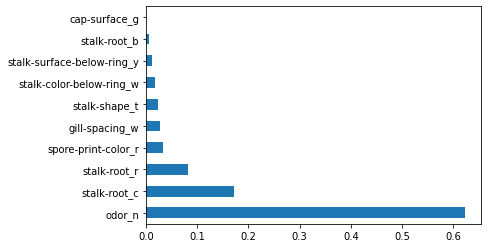

In [154]:
#plot graph of feature importances
feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances.nlargest(10))
plt.show()

Let's find the most important features by way of the chosen model (not the correlation matrix). We could then compare these to the correlation matrix for sanity check.

In [177]:
# Make predictions using validation dataset using CART model
model_r = DecisionTreeClassifier()
model_r.fit(X_reduced_train, Y_train)
predictions = model_r.predict(X_reduced_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[820   0]
 [  0 805]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [176]:
important_cols = feat_importances.nlargest(9)
X_reduced_train = pd.DataFrame()
X_reduced_validation = pd.DataFrame()
for col in important_cols.index:
    X_reduced_train[col] = X_train[col]
    X_reduced_validation[col] = X_validation[col]    

X_reduced_train.head()

,odor_n,stalk-root_c,stalk-root_r,spore-print-color_r,gill-spacing_w,stalk-shape_t,stalk-color-below-ring_w,stalk-surface-below-ring_y,stalk-root_b
1610,1,0,0,0,1,1,1,0,0
1939,1,0,0,0,1,1,1,0,0
5573,0,0,0,0,0,1,0,0,0
7076,0,0,0,0,0,1,0,0,0
2000,1,0,0,0,0,1,0,0,1


We see clearly that we can explain edibility with only a subset of features.

One could store this model using joblib for later use... https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/ and perhaps transfer to CoreML https://stackoverflow.com/questions/45291093/scikit-learn-convert-multi-output-decision-tree-to-coreml-model#45519253 in order to create a nifty little iOS app?

See also https://developer.apple.com/documentation/coreml/converting_trained_models_to_core_ml

In [158]:
# a desire to understand if we can compress feature dimensionality
# using PCA
from sklearn.decomposition import PCA

Now let's use PCA to explore if we can reduce dimensionality as suggested by the above.

In [160]:
# PCA trying a 2D representation
model3 = PCA(n_components=38)
pc = model3.fit_transform(X_train)

In [159]:
model = PCA(0.95)
test = model.fit(X_train)
model.n_components_


38

It will require 38 features to explain the data with a 95% confidence.

Let's plot a correlation matrix between the PCAs and the features to see if anyone stands out?

In other words we cross check that the feature importance from the CART model are somehow showing up in PCA.

In [161]:
principalDf = pd.DataFrame(data = pc)

In [162]:
finalDf = pd.concat([principalDf, df[['class_p']]], axis = 1)

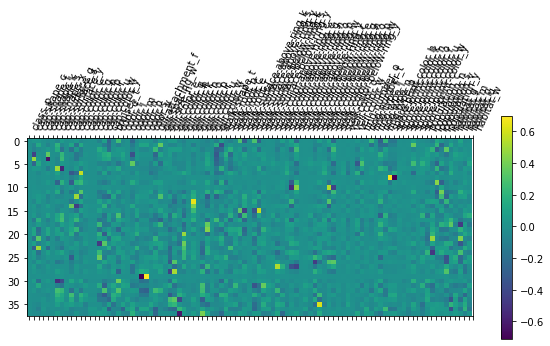

In [163]:
plt.matshow(model3.components_,cmap='viridis')
#plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

Yeah, a couple stands out with a correlation of .6 so that gives extra validation to the above reduction in features.

We could also use univariate feature selection which works by selecting the best features based on univariate statistical tests.
We can use sklearn’s SelectKBest to select a number of features to keep. This method uses statistical tests to select features having the highest correlation to the target. Here we will keep the top 10 features.

In [166]:
from sklearn.feature_selection import SelectKBest, f_classif
# feature extraction
k_best = SelectKBest(score_func=f_classif, k=10)
# fit on train set
fit = k_best.fit(X_train, Y_train)
# transform train set
univariate_features = fit.transform(X_train)

In [167]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.head()
featureScores.columns = ['Column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print 10 best features

Column         Score
22                      odor_n  10736.751953
19                      odor_f   4304.155273
45  stalk-surface-above-ring_k   3432.000000
48  stalk-surface-below-ring_k   3107.909912
75                 ring-type_p   2673.667725
28                 gill-size_n   2598.254395
17                   bruises_t   2138.792969
46  stalk-surface-above-ring_s   2077.726562
76         spore-print-color_h   2067.239990
73                 ring-type_l   1683.699463


Compared to the ones found by `model1.feature_importances_`


In [178]:
print(feat_importances.nlargest(10))


odor_n                        0.623007
stalk-root_c                  0.172322
stalk-root_r                  0.082753
spore-print-color_r           0.032472
gill-spacing_w                0.028023
stalk-shape_t                 0.024106
stalk-color-below-ring_w      0.017210
stalk-surface-below-ring_y    0.012373
stalk-root_b                  0.005886
cap-surface_g                 0.000616
dtype: float64
